In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [8]:
# load CSV
df = pd.read_csv('../data/citi_stock_data.csv', header=1, skiprows=[0])

# Rename the 'Date' column if necessary
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Rename and isolate the Close column
df.rename(columns={df.columns[0]: 'Close_C'}, inplace=True)
df = df[['Close_C']]

# Preview
df.head()

,Close_C
Date,
2019-01-01,44.022671
2019-01-08,46.650890
2019-01-15,49.967827
2019-01-22,50.545727
2019-01-29,50.711956


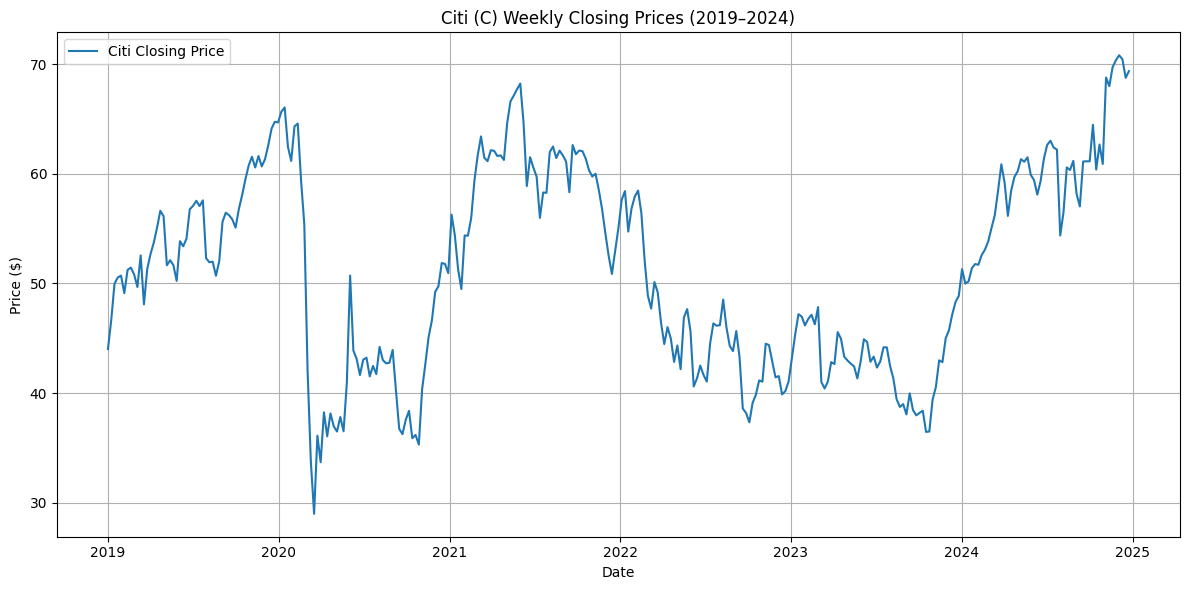

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close_C'], label='Citi Closing Price')
plt.title('Citi (C) Weekly Closing Prices (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

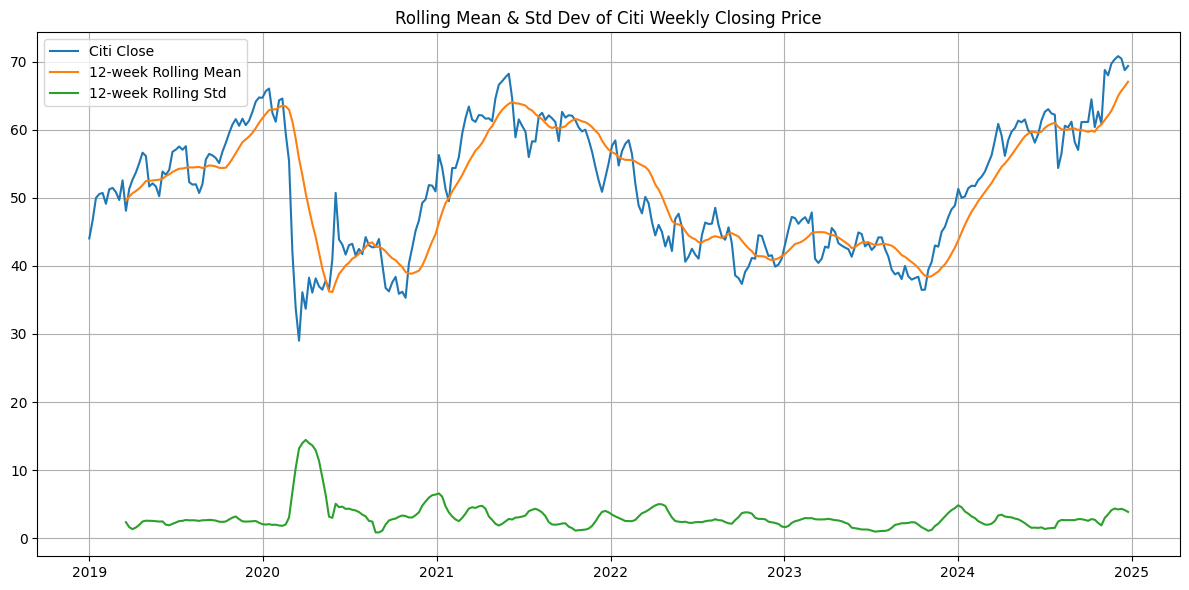

In [11]:
df['Rolling Mean (12w)'] = df['Close_C'].rolling(window=12).mean()
df['Rolling Std (12w)'] = df['Close_C'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close_C'], label='Citi Close')
plt.plot(df['Rolling Mean (12w)'], label='12-week Rolling Mean')
plt.plot(df['Rolling Std (12w)'], label='12-week Rolling Std')
plt.title('Rolling Mean & Std Dev of Citi Weekly Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
result = adfuller(df['Close_C'].dropna())

print("ADF Statistic: {:.4f}".format(result[0]))
print("p-value: {:.4f}".format(result[1]))

if result[1] < 0.05:
    print("→ Data is stationary (good for ARIMA)")
else:
    print("→ Data is NOT stationary — differencing needed for ARIMA")

ADF Statistic: -2.1496
p-value: 0.2251
→ Data is NOT stationary — differencing needed for ARIMA


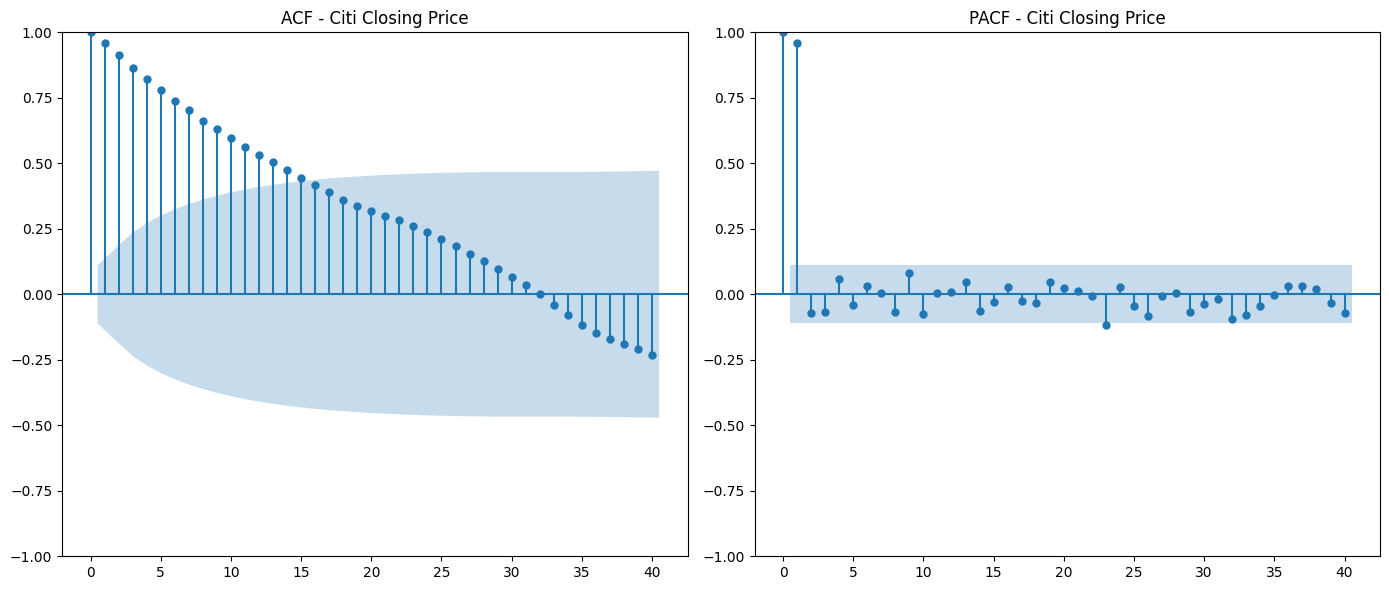

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop NA values to avoid issues
series = df['Close_C'].dropna()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(series, lags=40, ax=plt.gca(), title='ACF - Citi Closing Price')

plt.subplot(1, 2, 2)
plot_pacf(series, lags=40, ax=plt.gca(), title='PACF - Citi Closing Price', method='ywm')

plt.tight_layout()
plt.show()

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close_C'])
plt.title('Citi Weekly Close')
plt.savefig('../visuals/citi_closing_price.png')
plt.close()